In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [33]:
#take a look at cleaner csv
cleaner_hha_df='../datasets/cleaner_hha_df.csv'
cleaner_hha_df = pd.read_csv(cleaner_hha_df)
cleaner_hha_df.count()

Unnamed: 0                                                             41426
Year                                                                   41426
Provider ID                                                            41426
Agency Name                                                            41426
Street Address                                                         41426
City                                                                   41426
State                                                                  41426
Zip Code                                                               41426
Total Episodes (non-LUPA)                                              41426
Distinct Beneficiaries (non-LUPA)                                      41426
Average Number of Total Visits Per Episode (non-LUPA)                  41426
Average Number of Skilled Nursing Visits Per Episode (non-LUPA)        41426
Average Number of PT Visits Per Episode (non-LUPA)                     41426

In [3]:
features_raw = cleaner_hha_df.drop(['Average HCC Score', 'risk_categorical', 'Provider ID', 'Agency Name', 'Street Address',\
                                    'City', 'State',], axis = 1)

real_hcc=cleaner_hha_df['Average HCC Score']

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(
    features_raw,
    real_hcc, 
    test_size=0.2,
    random_state=1)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 33140 samples.
Testing set has 8286 samples.


In [5]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [6]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [34]:
from keras.models import Sequential
model = Sequential()

In [35]:
from keras.layers import Dense
#? input 6x2 in middle
model.add(Dense(units=10,activation='relu',input_dim=39))
model.add(Dense(units=5, activation='relu'))

In [36]:
model.add(Dense(units=1, activation='linear'))

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                400       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='adam', loss='mse')


In [41]:
model.fit(
    X_train_scaled, 
    y_train, 
    epochs=100,
    shuffle=True,
    verbose=2)

Epoch 1/100
 - 2s - loss: 0.0820
Epoch 2/100
 - 2s - loss: 0.0840
Epoch 3/100
 - 1s - loss: 0.0822
Epoch 4/100
 - 2s - loss: 0.0815
Epoch 5/100
 - 2s - loss: 0.0817
Epoch 6/100
 - 2s - loss: 0.0818
Epoch 7/100
 - 2s - loss: 0.0812
Epoch 8/100
 - 2s - loss: 0.0812
Epoch 9/100
 - 2s - loss: 0.0814
Epoch 10/100
 - 1s - loss: 0.0876
Epoch 11/100
 - 2s - loss: 0.0812
Epoch 12/100
 - 2s - loss: 0.0810
Epoch 13/100
 - 1s - loss: 0.0811
Epoch 14/100
 - 1s - loss: 0.0812
Epoch 15/100
 - 2s - loss: 0.0810
Epoch 16/100
 - 2s - loss: 0.0818
Epoch 17/100
 - 2s - loss: 0.0823
Epoch 18/100
 - 2s - loss: 0.0810
Epoch 19/100
 - 2s - loss: 0.0811
Epoch 20/100
 - 2s - loss: 0.0812
Epoch 21/100
 - 2s - loss: 0.0812
Epoch 22/100
 - 2s - loss: 0.0823
Epoch 23/100
 - 2s - loss: 0.0811
Epoch 24/100
 - 2s - loss: 0.0810
Epoch 25/100
 - 2s - loss: 0.0808
Epoch 26/100
 - 2s - loss: 0.0811
Epoch 27/100
 - 2s - loss: 0.0809
Epoch 28/100
 - 2s - loss: 0.0808
Epoch 29/100
 - 2s - loss: 0.0837
Epoch 30/100
 - 2s - lo

In [65]:
model_loss = model.evaluate(
    X_test_scaled, 
    y_test,
    verbose=2)
print(f'Loss: {model_loss}')

Loss: 0.08539706747506857


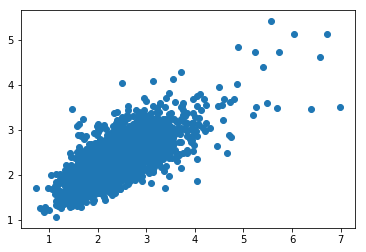

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test,model.predict(X_test_scaled) )

In [67]:
model.predict(X_test_scaled).shape

(8286, 1)

In [68]:
err = model.predict(X_test_scaled)[:,0] - y_test

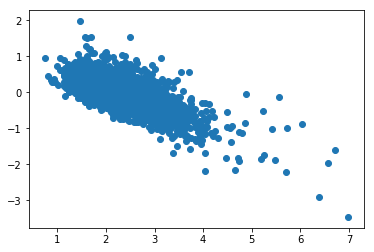

In [69]:
plt.scatter(y_test, err)

In [70]:
preds = model.predict_classes(X_test_scaled)